# Treelets Package Exploration

Experiments with `treelets` package to better understand implementation. 

## Setup

In [27]:
library("treelet") # treelet implimentation
library("corrplot") # graphical display of correlation matrices
libraray("Matrix") # easy matrix constrictions

ERROR: Error in libraray("Matrix"): could not find function "libraray"


## Data

Package ships with example data; a 50x50 matrix representing kinship coefficients between individuals. 

In [7]:
data(Ahat)
head(Ahat, n = 5)

0.98410920,-0.020179050,-0.03105315,0.03319017,0.047661140,0.04192193,-0.025702080,0.002069539,-0.013459660,-0.019767870,...,-0.02553202,-0.02104211,-0.030846660,-0.02782707,-0.01968250,-0.037795960,-0.03043981,-0.015781080,-0.02716874,-0.01409417
-0.02017905,0.986418000,0.02369104,-0.04924143,-0.009453736,-0.00534028,-0.009654304,-0.018387940,-0.024188700,-0.013177490,...,-0.02278688,-0.02918999,-0.010842800,-0.02864238,-0.02602699,-0.023950100,-0.03175537,-0.020465880,-0.01991455,-0.01650297
-0.03105315,0.023691040,0.99866070,-0.03165350,-0.024616800,-0.01563114,-0.014581210,-0.027060400,-0.011055520,-0.021291680,...,-0.01665991,-0.01180871,-0.002023782,-0.01497177,-0.03662197,-0.020790930,-0.02060452,-0.003217629,-0.02016654,-0.03370779
0.03319017,-0.049241430,-0.03165350,1.02229000,-0.043874960,-0.01115453,-0.008958720,-0.016960310,-0.023849610,-0.005477218,...,-0.03303767,-0.02940036,-0.040653740,-0.03033683,-0.02311899,-0.023035900,-0.02042668,-0.019361610,-0.01594145,-0.03179055
0.04766114,-0.009453736,-0.02461680,-0.04387496,0.998337700,0.01623784,-0.008447790,-0.026069320,0.007757306,-0.012551880,...,-0.01441656,-0.03058982,-0.033827380,-0.03106121,-0.01389541,-0.007770591,-0.01517695,-0.036201960,-0.03073573,-0.01417750


`Ahat` is not a variance-covariance matrix, but we can treat it as if it were and transform it so its entries lie in the interval [-1,1] to visualize the data with standard tools. 

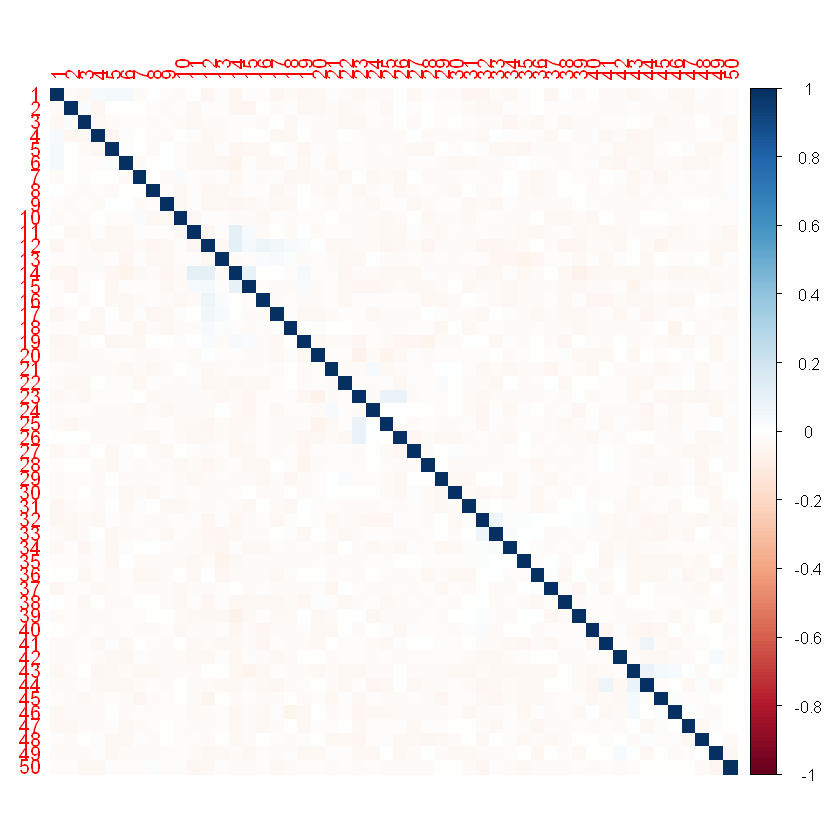

In [8]:
C = cov2cor(Ahat)
corrplot(corr = C, 
         method = "color")

## Build JTree

Other functions in the package mostly wrap this function. Returns information on the construction of the treelet hierarchical tree on which the basis functions are supported. In particular the function returns: 

* Information on which variables have been merged at each step of the algorithm
* The transformed variance-covaraince matrix at each step of the algorithm

## JTree Basis

*Returns information on the construction of the treelet orthonormal basis at each level of the tree up
to the maximum tree height specified.*

## Run JTree

*Returns information on the simultaneous construction of the treelet orthonormal basis and hierarchical tree, including which nodes were merged at each step and the basis at each specified step of
the construction.*

In [9]:
tree = Run_JTree(X = Ahat, 
                 maxlev = 49, # maximum height of tree
                 whichsave = c(1:50) # save basis functions for these levels 
                )

computing the Correlation....

building the tree......

computing the basis for the level......



Track which nodes / clusters were combined at each step. 

In [10]:
t(tree$Zpos)

11,43,23,11,12,32,25,1,5,13,...,37,4,5,20,25,5,5,11,11,11
14,44,25,15,16,33,26,5,6,17,...,42,5,50,42,42,22,25,33,43,25


Track which variable was designated as the sum variable (1) and which was the difference variable (2).

In [11]:
t(tree$PCidx)

1,1,2,1,2,2,1,2,1,2,...,2,2,1,2,1,1,2,1,1,1
2,2,1,2,1,1,2,1,2,1,...,1,1,2,1,2,2,1,2,2,2


At each level of the tree the extract the estimated variance-covraince matrix. 

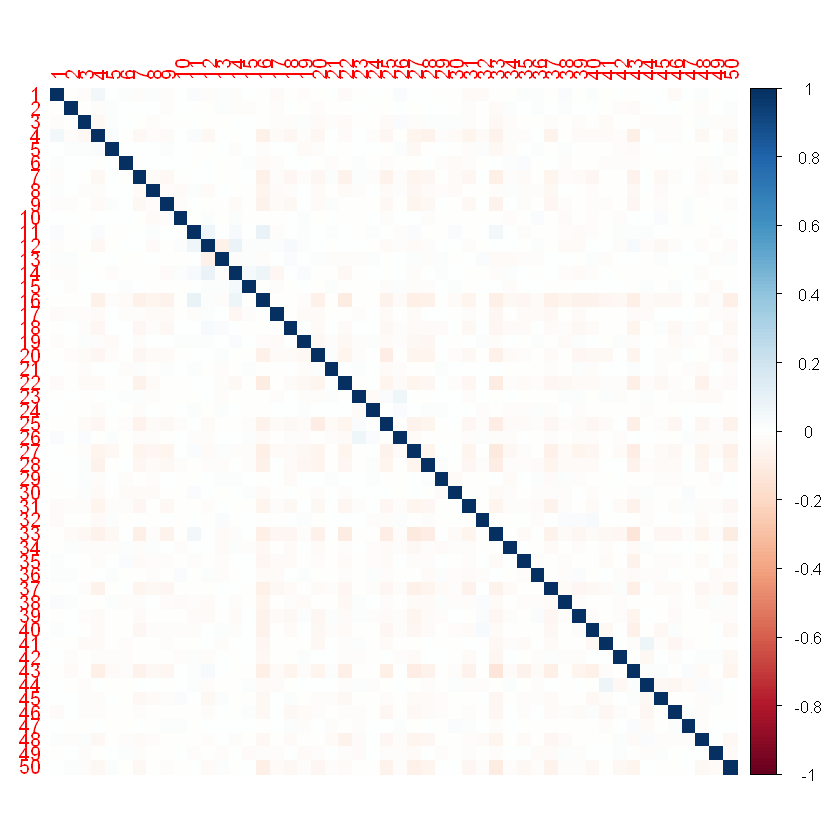

In [12]:
C = cov2cor(tree$TreeCovs[[49]])
corrplot(corr = C, method = "color")

In [47]:
tree = Run_JTree(X = matrix(bdiag(A,B,C), nrow = 6), 
                 maxlev = 4, # maximum height of tree
                 whichsave = c(1:5) # save basis functions for these levels 
                )

computing the Correlation....

building the tree......

computing the basis for the level......



In [53]:
tree = Run_JTree(X = matrix(rep(1,6*6), nrow = 6), 
                 maxlev = 5, # maximum height of tree
                 whichsave = c(1:5) # save basis functions for these levels 
                )

computing the Correlation....

building the tree......

Warning message in sqrt(matrix(dnew[compno], ncol = 1) %*% dnew):
"NaNs produced"
computing the basis for the level......



In [54]:
tree

0.7071068,-0.7071068,0,0,0,0
0.7071068,0.7071068,0,0,0,0
0.0000000,0.0000000,1,0,0,0
0.0000000,0.0000000,0,1,0,0
0.0000000,0.0000000,0,0,1,0
0.0000000,0.0000000,0,0,0,1
0.5773503,-0.7071068,-0.4082483,0,0,0
0.5773503,0.7071068,-0.4082483,0,0,0
0.5773503,0.0000000,0.8164966,0,0,0
0.0000000,0.0000000,0.0000000,1,0,0
0.0000000,0.0000000,0.0000000,0,1,0
